### Main libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import seaborn as sns

In [ ]:
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings('ignore')

### Prophet

In [ ]:
from prophet import Prophet

In [ ]:
price = pd.read_csv('agrodata.csv')
weather = pd.read_csv('agroweather_data.csv')

In [ ]:
df_pr = price.copy()
df_pr.head()

,Date,Price
0,02/01/2020,74
1,03/01/2020,81
2,04/01/2020,77
3,07/01/2020,73
4,08/01/2020,67


In [ ]:
df_pr.columns = ['ds', 'y']
df_pr

,ds,y
0,02/01/2020,74
1,03/01/2020,81
2,04/01/2020,77
3,07/01/2020,73
4,08/01/2020,67
...,...,...
983,14/02/2024,125
984,14/02/2024,125
985,15/02/2024,124
986,16/02/2024,122


In [ ]:
df_pr['ds'] = pd.to_datetime(df_pr['ds'], format = '%d/%m/%Y')

In [ ]:
train_data_pr = df_pr.iloc[:len(df_pr)-48]
test_data_pr = df_pr.iloc[len(df_pr)-48:]

In [ ]:
m = Prophet()
m.fit(train_data_pr)
future = m.make_future_dataframe(periods=12,freq='MS')
prophet_pred = m.predict(future)

17:21:22 - cmdstanpy - INFO - Chain [1] start processing


17:21:22 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
prophet_pred.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
934,2024-08-01,148.106394,85.508040,196.703441,139.696289,156.688677,-7.570854,-7.570854,-7.570854,-0.604034,-0.604034,-0.604034,-6.966820,-6.966820,-6.966820,0.0,0.0,0.0,140.535540
935,2024-09-01,147.382965,94.251769,203.923677,137.139892,157.960639,1.785712,1.785712,1.785712,-3.150826,-3.150826,-3.150826,4.936538,4.936538,4.936538,0.0,0.0,0.0,149.168678
936,2024-10-01,146.682874,90.734945,207.583788,134.640879,159.485602,2.008327,2.008327,2.008327,1.884359,1.884359,1.884359,0.123968,0.123968,0.123968,0.0,0.0,0.0,148.691201
937,2024-11-01,145.959445,68.166775,178.823452,132.017654,161.166229,-22.420275,-22.420275,-22.420275,0.310723,0.310723,0.310723,-22.730998,-22.730998,-22.730998,0.0,0.0,0.0,123.539170
938,2024-12-01,145.259353,60.351920,177.646961,128.980575,162.869420,-26.579135,-26.579135,-26.579135,-3.150826,-3.150826,-3.150826,-23.428309,-23.428309,-23.428309,0.0,0.0,0.0,118.680219


In [ ]:
prophet_pred = pd.DataFrame({"Date" : prophet_pred[-12:]['ds'], "Pred" : prophet_pred[-48:]["yhat"]})

In [ ]:
prophet_pred = prophet_pred.set_index("Date")

In [ ]:
prophet_pred.tail()

,Pred
Date,
2024-08-01,140.535540
2024-09-01,149.168678
2024-10-01,148.691201
2024-11-01,123.539170
2024-12-01,118.680219


In [ ]:
test_data_pr["Prophet_Predictions"] = prophet_pred['Pred'].values

In [ ]:
test_data_pr

,ds,y,Prophet_Predictions
940,2023-12-23,114,130.854345
941,2023-12-26,118,128.419402
942,2023-12-26,118,128.976110
943,2023-12-27,118,128.524070
944,2023-12-28,114,127.786670
945,2023-12-29,109,129.580693
946,2023-12-30,112,129.052982
947,2024-01-02,121,126.982041
948,2024-01-03,125,127.944896
949,2024-01-04,134,127.927745


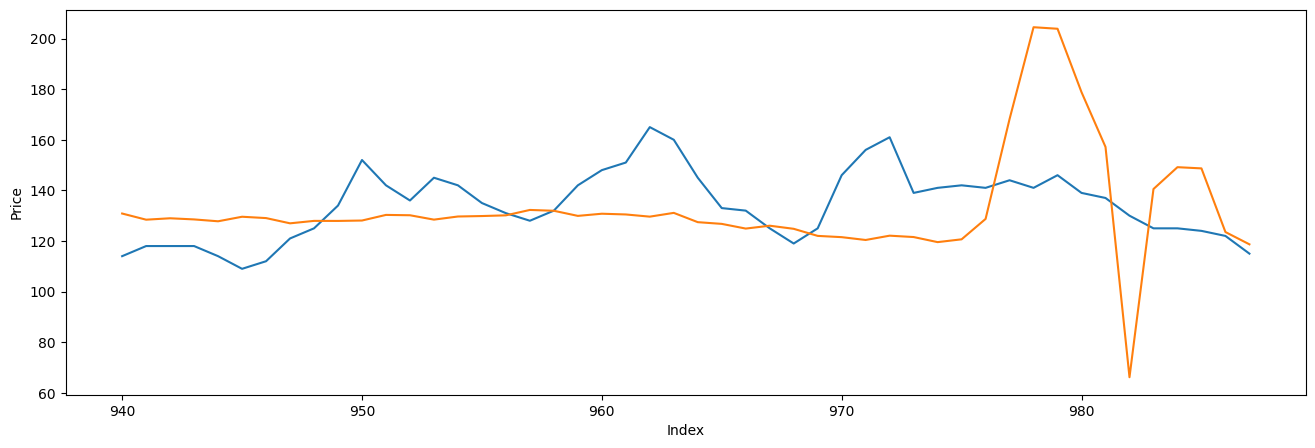

In [ ]:
plt.figure(figsize=(16,5))
ax = sns.lineplot(x= test_data_pr.index, y=test_data_pr["y"])
sns.lineplot(x=test_data_pr.index, y = test_data_pr["Prophet_Predictions"])
plt.ylabel('Price')
plt.xlabel('Index')

plt.show()

In [ ]:
from statsmodels.tools.eval_measures import rmse

In [ ]:
import random

In [ ]:
random_indices = random.sample(range(len(test_data_pr)), 15)

In [ ]:
type(test_data_pr)

pandas.core.frame.DataFrame

In [ ]:
random_real_values = test_data_pr['y'].iloc[random_indices]
random_predicted_values = test_data_pr['Prophet_Predictions'].iloc[random_indices]

In [ ]:
prophet_rmse_error = rmse(random_real_values, random_predicted_values)
prophet_mse_error = prophet_rmse_error**2
mean_value = price['Price'].mean()

print(f'MSE Error: {prophet_mse_error}\nRMSE Error: {prophet_rmse_error}\nMean: {mean_value}')

MSE Error: 665.9769269740559
RMSE Error: 25.806528766458612
Mean: 120.7165991902834


In [ ]:
prophet_error = abs(random_real_values - random_predicted_values)
print(f"El error obtenido con Prophet es de {round(np.mean(prophet_error/100), 3)}€")

El error obtenido con Prophet es de 0.2€


In [ ]:
prophet_error.describe()

count    15.000000
mean     20.036723
std      16.834488
min       1.539170
25%       6.462709
50%      17.052982
75%      24.429939
max      63.480692
dtype: float64

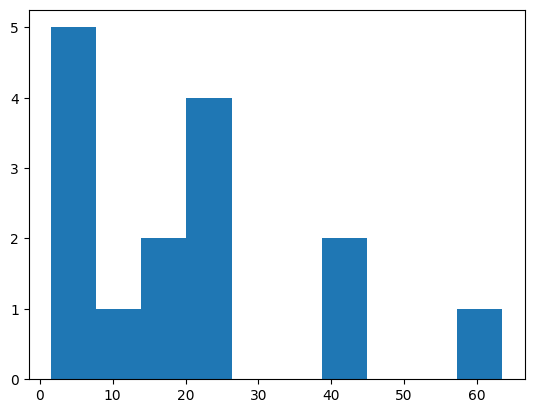

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.hist(prophet_error)
plt.show()
plt.clf()